# Assignment 2: Programming MLPs in Keras and PyTorch

We will use the Bank Marketing Data Set from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers, losses, metrics
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.regularizers import L2


## Load the dataset
Load the bank-additional dataset: 

In [2]:
data_path="/content/bank-additional-full.csv"

df = pd.read_csv(data_path, sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
df.shape

(41188, 21)

Does the dataset has imbalance in its label classes?

In [3]:
df.y.value_counts()/len(df.y)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Let's convert categorical variables to dummy and also seperate the X and y:

In [4]:
X = df.copy()
del X['y']
X = pd.get_dummies(X, drop_first=True)
y = np.where(df.y == "yes", 1, 0)

## Keras

Split into 20\% validation and th rest test:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,        
                                    test_size = 0.2, random_state = 1)

Standardize the input values using a standard scaler

In [6]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Define a model in Keras with two hidden layers of size 10 and 8 with a ReLU activation function. The output layer will be sigmoid. use adam optimizer and binary_cross entropy with accuracy metrics. Run the training for 10 epochs.

In [7]:
batch_size = 20
epochs = 10

model = Sequential()
#CODE HERE
model.add(Dense(10, activation='relu', input_shape=(X_train_std.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(X_train_std, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)


Epoch 1/10
1318/1318 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.8741 - val_loss: 0.2021 - val_accuracy: 0.9086
Epoch 2/10
1318/1318 [==============================] - 3s 2ms/step - loss: 0.1953 - accuracy: 0.9086 - val_loss: 0.1944 - val_accuracy: 0.9088
Epoch 3/10
1318/1318 [==============================] - 3s 2ms/step - loss: 0.1889 - accuracy: 0.9108 - val_loss: 0.1913 - val_accuracy: 0.9068
Epoch 4/10
1318/1318 [==============================] - 4s 3ms/step - loss: 0.1855 - accuracy: 0.9114 - val_loss: 0.1909 - val_accuracy: 0.9086
Epoch 5/10
1318/1318 [==============================] - 3s 2ms/step - loss: 0.1837 - accuracy: 0.9122 - val_loss: 0.1898 - val_accuracy: 0.9083
Epoch 6/10
1318/1318 [==============================] - 3s 2ms/step - loss: 0.1819 - accuracy: 0.9125 - val_loss: 0.1890 - val_accuracy: 0.9088
Epoch 7/10
1318/1318 [==============================] - 3s 2ms/step - loss: 0.1806 - accuracy: 0.9137 - val_loss: 0.1897 - val_accuracy:

In [8]:
score = model.evaluate(X_test_std, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19455069303512573
Test accuracy: 0.9071376323699951


Plot the train and validation over the number of epoch

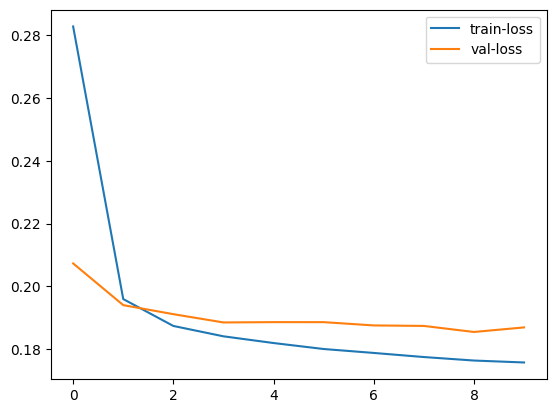

In [28]:
plt.plot(history.history['loss'], label="train-loss")
plt.plot(history.history['val_loss'], label="val-loss")
plt.legend()
plt.show()

### Regularization
Regularize the model above using dropouts(0.2 parameter)and early stopping (patience=2). Train the model and compare the performance.

Epoch 1/100
1318/1318 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.8897 - val_loss: 0.1976 - val_accuracy: 0.9049
Epoch 2/100
1318/1318 [==============================] - 2s 2ms/step - loss: 0.2128 - accuracy: 0.9016 - val_loss: 0.1902 - val_accuracy: 0.9041
Epoch 3/100
1318/1318 [==============================] - 2s 2ms/step - loss: 0.2043 - accuracy: 0.9016 - val_loss: 0.1888 - val_accuracy: 0.9065
Epoch 4/100
1318/1318 [==============================] - 2s 2ms/step - loss: 0.2002 - accuracy: 0.9036 - val_loss: 0.1884 - val_accuracy: 0.9068
Epoch 5/100
1318/1318 [==============================] - 3s 2ms/step - loss: 0.1965 - accuracy: 0.9053 - val_loss: 0.1871 - val_accuracy: 0.9094
Epoch 6/100
1318/1318 [==============================] - 2s 2ms/step - loss: 0.1952 - accuracy: 0.9055 - val_loss: 0.1858 - val_accuracy: 0.9091
Epoch 7/100
1318/1318 [==============================] - 2s 2ms/step - loss: 0.1950 - accuracy: 0.9082 - val_loss: 0.1856 - val_ac

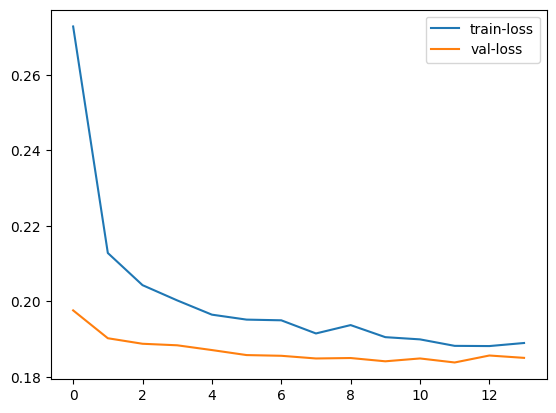

In [29]:
batch_size = 20
epochs = 100

model = Sequential()
# CODE HERE
model.add(Dense(10, activation='relu', input_dim=X_train_std.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(X_train_std, y_train, 
                    validation_split=0.2, 
                    batch_size=batch_size, epochs=epochs, 
                    callbacks=[early_stop], verbose=1)

score = model.evaluate(X_test_std, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['loss'], label="train-loss")
plt.plot(history.history['val_loss'], label="val-loss")
plt.legend()
plt.show()




# Another Approach

In [16]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

batch_size = 20
epochs = 100

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_std.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

history = model.fit(X_train_std, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1, callbacks=[es])


Epoch 1/100
1318/1318 [==============================] - 3s 2ms/step - loss: 0.3026 - accuracy: 0.8858 - val_loss: 0.2096 - val_accuracy: 0.8985
Epoch 2/100
1318/1318 [==============================] - 3s 2ms/step - loss: 0.2172 - accuracy: 0.8982 - val_loss: 0.1931 - val_accuracy: 0.9062
Epoch 3/100
1318/1318 [==============================] - 2s 2ms/step - loss: 0.2039 - accuracy: 0.9005 - val_loss: 0.1896 - val_accuracy: 0.9077
Epoch 4/100
1318/1318 [==============================] - 2s 2ms/step - loss: 0.2005 - accuracy: 0.9021 - val_loss: 0.1883 - val_accuracy: 0.9076
Epoch 5/100
1318/1318 [==============================] - 2s 2ms/step - loss: 0.1960 - accuracy: 0.9053 - val_loss: 0.1878 - val_accuracy: 0.9077
Epoch 6/100
1318/1318 [==============================] - 2s 2ms/step - loss: 0.1937 - accuracy: 0.9057 - val_loss: 0.1873 - val_accuracy: 0.9094
Epoch 7/100
1318/1318 [==============================] - 2s 2ms/step - loss: 0.1921 - accuracy: 0.9064 - val_loss: 0.1867 - val_ac

Test loss: 0.18901024758815765
Test accuracy: 0.9093226790428162


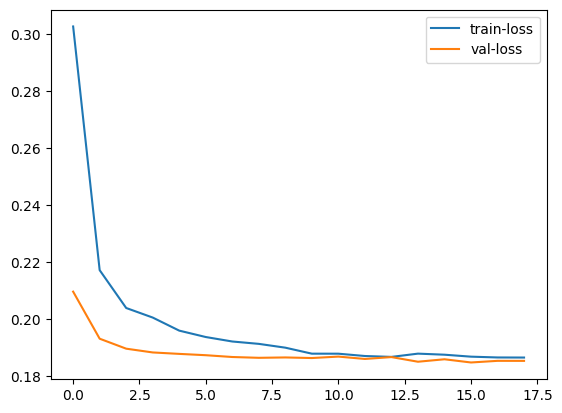

In [17]:
score = model.evaluate(X_test_std, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['loss'], label="train-loss")
plt.plot(history.history['val_loss'], label="val-loss")
plt.legend()
plt.show()

Now, Regularize the model using early-stopping and kernel and bias regularizers (L2). Train the model and compare the performance.

In [10]:
# CODE HERE
from keras import regularizers

batch_size = 20
epochs = 100

model = Sequential()
model.add(Dense(10, input_dim=X_train_std.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history = model.fit(X_train_std, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[es])


Epoch 1/100
1318/1318 [==============================] - 9s 6ms/step - loss: 0.4281 - accuracy: 0.8825 - val_loss: 0.2667 - val_accuracy: 0.9046
Epoch 2/100
1318/1318 [==============================] - 9s 7ms/step - loss: 0.2596 - accuracy: 0.9023 - val_loss: 0.2310 - val_accuracy: 0.9082
Epoch 3/100
1318/1318 [==============================] - 7s 6ms/step - loss: 0.2404 - accuracy: 0.9030 - val_loss: 0.2221 - val_accuracy: 0.9091
Epoch 4/100
1318/1318 [==============================] - 5s 4ms/step - loss: 0.2308 - accuracy: 0.9039 - val_loss: 0.2162 - val_accuracy: 0.9093
Epoch 5/100
1318/1318 [==============================] - 3s 2ms/step - loss: 0.2271 - accuracy: 0.9041 - val_loss: 0.2134 - val_accuracy: 0.9115
Epoch 6/100
1318/1318 [==============================] - 3s 3ms/step - loss: 0.2255 - accuracy: 0.9042 - val_loss: 0.2106 - val_accuracy: 0.9109
Epoch 7/100
1318/1318 [==============================] - 4s 3ms/step - loss: 0.2234 - accuracy: 0.9044 - val_loss: 0.2102 - val_ac

In [11]:
score = model.evaluate(X_test_std, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21138979494571686
Test accuracy: 0.9077445864677429


### Batch Normalization
Batch normalization standardize the inputs to a layer in a deep learning neural network. It helps accelerating the training process and might even improve the performance of the model via a regularization effect. 
Add Batch Normalizations to the original network and train the model and compare the performance.

In [12]:
batch_size = 20
epochs = 100

model = Sequential()
# CODE HERE
model.add(Dense(10, activation='relu', input_shape=(X_train_std.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=2)
model_checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

history = model.fit(X_train_std, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(X_test_std, y_test), 
                    callbacks=[early_stopping, model_checkpoint])

score = model.evaluate(X_test_std, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/100
1648/1648 [==============================] - 8s 3ms/step - loss: 0.3161 - accuracy: 0.8693 - val_loss: 0.2290 - val_accuracy: 0.9056
Epoch 2/100
1648/1648 [==============================] - 5s 3ms/step - loss: 0.2189 - accuracy: 0.9037 - val_loss: 0.2123 - val_accuracy: 0.9081
Epoch 3/100
1648/1648 [==============================] - 6s 4ms/step - loss: 0.2124 - accuracy: 0.9031 - val_loss: 0.2057 - val_accuracy: 0.9063
Epoch 4/100
1648/1648 [==============================] - 5s 3ms/step - loss: 0.2040 - accuracy: 0.9052 - val_loss: 0.2014 - val_accuracy: 0.9058
Epoch 5/100
1648/1648 [==============================] - 6s 4ms/step - loss: 0.2007 - accuracy: 0.9043 - val_loss: 0.1997 - val_accuracy: 0.9076
Epoch 6/100
1648/1648 [==============================] - 5s 3ms/step - loss: 0.1983 - accuracy: 0.9061 - val_loss: 0.1986 - val_accuracy: 0.9059
Epoch 7/100
1648/1648 [==============================] - 7s 4ms/step - loss: 0.1963 - accuracy: 0.9070 - val_loss: 0.1979 - val_ac

## PyTorch
Create the same original model that you developed in Keras using PyTorch this time:

In [13]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.optim import SGD
from torch.nn import BCELoss
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from numpy import vstack
from sklearn.metrics import accuracy_score

In [14]:
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)

In [15]:
X_tensor = torch.Tensor(X_std.astype('float32'))
y_tensor = torch.Tensor(y.astype('float32'))

In [16]:
class MyDataset(Dataset):
    def __init__(self, X,y):
        self.X = X
        self.y = y
 
    def __len__(self):
        return len(self.X)
 
    def __getitem__(self, idx):
        return (self.X[idx], self.y[idx])

In [17]:
test_size = round(0.2 * len(df))
train_size = len(df) - test_size     
train,test=random_split(MyDataset(X_tensor,y_tensor),[train_size, test_size])

In [18]:
train_dl = DataLoader(train, batch_size=20, shuffle=True)
test_dl = DataLoader(test, batch_size=100, shuffle=False)

In [19]:
X_tensor.shape

torch.Size([41188, 53])

In [20]:
y_tensor.shape

torch.Size([41188])

In [21]:
len(train)

32950

In [22]:
class bank_marketing_MLP(nn.Module): 

   def __init__(self): 
       super(bank_marketing_MLP, self).__init__()
       
       # Define the layers
       self.fc1 = nn.Linear(53, 10)
       self.fc2 = nn.Linear(10, 8)
       self.out = nn.Linear(8, 1)

       # Define activation function
       self.relu = nn.ReLU()
       self.sigmoid = nn.Sigmoid()

   def forward(self, x): 
       # Define forward pass
       x = self.fc1(x)
       x = self.relu(x)
       x = self.fc2(x)
       x = self.relu(x)
       x = self.out(x)
       x = self.sigmoid(x)
       return x


In [23]:
def train_model(train_dl, model):
    # define the optimization and loss
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

    for epoch in range(15):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            
            # compute the model predictions
            outputs = model(inputs)
            
            # calculate the loss
            # had to add unsqueeze otherwise getting error in training model
            loss = criterion(outputs, targets.unsqueeze(1))
            
            # credit assignment
            loss.backward()
            
            # update model weights
            optimizer.step()
        print(f'epoch {epoch} loss{loss}')


In [24]:
model = bank_marketing_MLP()
train_model(train_dl, model)

epoch 0 loss0.10167662799358368
epoch 1 loss0.0674666166305542
epoch 2 loss0.03300010412931442
epoch 3 loss0.008244872093200684
epoch 4 loss0.03690536692738533
epoch 5 loss0.28023478388786316
epoch 6 loss0.1788226217031479
epoch 7 loss0.1350419819355011
epoch 8 loss0.14349910616874695
epoch 9 loss0.10878647863864899
epoch 10 loss0.22907784581184387
epoch 11 loss0.09164656698703766
epoch 12 loss0.23936128616333008
epoch 13 loss0.11891581863164902
epoch 14 loss0.12473944574594498


In [25]:
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

In [26]:
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)


Accuracy: 0.911


In [28]:
def predict(row, model):
    row = Tensor([row])
    yhat = model(row)
    yhat = yhat.detach().numpy()
    return yhat

## Hyper Parameter Tunning (optional bonus points)

Find the optimal parameter for the following range of values:
- Number of units at hidden layers=[10,8,6,1], [20,16,12,1],[40,32,24,1]
- Number of hidden layers=[1,2,3]
- Batch size=[20,50,100]
- with/without Batch normalization
- Activation functions=[Relu,tanh,sigmoid, softplus]
- optimizers=[SGD,RMSprop,Adam]
- Learning rate=[0.01,0.05,0.1]
- With or without ExponentialDecay learning rate scheduler

What is the validation accuracy of the optimal model?

# Francis: Will do this after I get back to the U.S.